In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold,ShuffleSplit


from sklearn.decomposition import PCA

plt.rcParams.update({'font.size':14})
plt.rcParams.update({"font.family" : "Times new roman"})

# Import Both the Datasets

In [10]:
df1=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Lim_solar_data.csv')
df2=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Github/FaultDiagnosis/PanelFaultDiagnosis/PreProcessed Data/Max_solar_data.csv')

df = pd.concat([df1,df2],ignore_index=True,axis=0)

In [11]:
df

,Time,Ipv,Vpv,Vdc,ia,ib,ic,va,vb,vc,Iabc,If,Vabc,Vf,label
0,0.000028,1.572327,101.348877,144.140625,-0.135133,0.490112,-0.354985,41.744537,-149.872894,109.064585,1.000000,50.000000,1.000000,50.000000,F0L
1,0.010027,1.539215,101.251221,143.261719,0.086425,-0.490112,0.349971,-42.311096,149.029083,-108.377482,1.000000,50.000000,1.000000,50.000000,F0L
2,0.020026,1.637604,101.031494,143.554688,-0.155274,0.469971,-0.307988,41.515503,-149.933167,109.104767,1.000000,50.000000,1.000000,50.000000,F0L
3,0.030025,1.577057,101.287842,142.968750,0.106566,-0.456543,0.336543,-42.106171,150.222473,-109.249420,0.461228,49.921509,151.655756,50.078264,F0L
4,0.040024,1.613007,101.049805,143.847656,-0.155274,0.456543,-0.314702,41.370850,-150.162201,109.245402,0.311221,49.594346,154.027080,50.193078,F0L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,14.353236,2.363220,87.280273,145.019531,0.542968,-0.718384,0.161982,-125.233612,143.013916,-18.270518,0.700222,49.837684,155.419819,49.997678,F7M
21632,14.363235,2.308350,86.737061,145.312500,-0.631959,0.590820,-0.005864,126.101532,-142.121887,18.503571,0.696735,49.979017,155.409061,50.000249,F7M
21633,14.373234,2.341461,87.103271,145.312500,0.536254,-0.711670,0.168696,-124.751434,142.893372,-18.073629,0.692128,50.219535,155.370171,50.000483,F7M
21634,14.383233,2.426605,87.011719,145.312500,-0.625245,0.584106,0.000850,125.438538,-143.050079,18.379008,0.690443,50.113452,155.363070,49.999983,F7M


In [12]:
df['label'].unique()

array(['F0L', 'F1L', 'F2L', 'F3L', 'F4L', 'F5L', 'F6L', 'F7L', 'F0M',
       'F1M', 'F2M', 'F3M', 'F4M', 'F5M', 'F6M', 'F7M'], dtype=object)

# Divide the dataset into Train-test split and do the standard scalling

In [13]:
def split_transform(df,split_ratio):
    X=df.iloc[:,1:-1]
    Y=df.iloc[:,-1]
    X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=split_ratio,shuffle=True)

    scaler=StandardScaler()
    X_sc_train = scaler.fit_transform(X_train)
    X_sc_test = scaler.transform(X_test)

    print("The number of samples in the Training set is {}".format(len(X_sc_train)))
    print("The number of samples in the Test set is {}".format(len(X_sc_test)))
    
    return  X_sc_train, X_sc_test,y_train,y_test,scaler

In [14]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.001)

The number of samples in the Training set is 21614
The number of samples in the Test set is 22


# Do Model training

In [15]:
def Model_with_cross_val(df,clf,k_fold,test_size):
    # Split transform the data
    X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.01)
    print("")
    #Generate k-fold with shuffled split
    cv = ShuffleSplit(n_splits=k_fold, test_size=test_size)
    
    # get score for each split
    scores = cross_val_score(clf, X_sc_train,y_train, cv=cv, n_jobs=-1)
    
    #print scores with mean and std
    print(scores)
    
    print("{} accuracy with a standard deviation of {}".format(np.mean(scores),np.std(scores)))
    print("")

In [16]:
clf = RandomForestClassifier()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.98474946 0.98303766 0.98708372 0.98537193 0.98537193]
0.9851229380641146 accuracy with a standard deviation of 0.0013005031071133676



In [17]:
clf = DecisionTreeClassifier()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.96887644 0.96607532 0.96638655 0.96607532 0.96436352]
0.9663554310613135 accuracy with a standard deviation of 0.0014478311048381953



In [18]:
clf = SVC()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.94086523 0.93853097 0.94257703 0.94506692 0.94257703]
0.9419234360410831 accuracy with a standard deviation of 0.0021616875635462897



In [19]:
clf = KNeighborsClassifier(n_neighbors=5)
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.94677871 0.95331466 0.95222533 0.94895736 0.95160286]
0.9505757858699034 accuracy with a standard deviation of 0.002379680654044876



In [20]:
clf = LogisticRegression()
Model_with_cross_val(df=df,clf=clf,k_fold=5,test_size=0.3)

The number of samples in the Training set is 21419
The number of samples in the Test set is 217

[0.73840647 0.74945534 0.73607221 0.74712107 0.74494242]
0.7431995020230314 accuracy with a standard deviation of 0.005124907961809526



# Do prediction with best performing Model

The number of samples in the Training set is 17308
The number of samples in the Test set is 4328


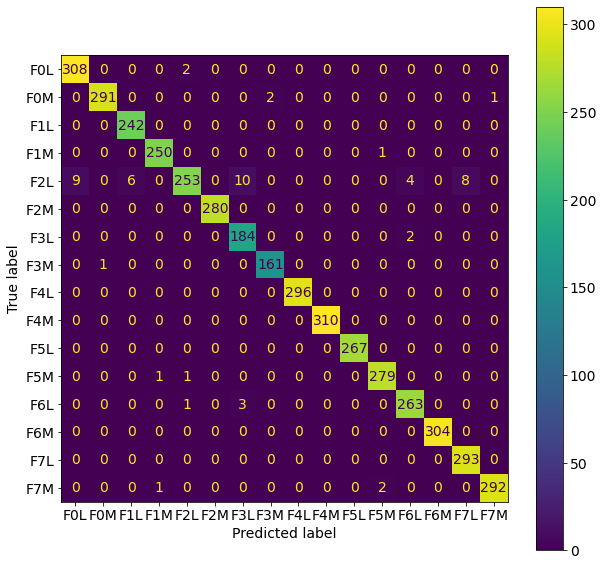

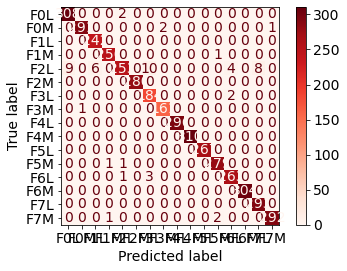

In [21]:
X_sc_train, X_sc_test,y_train,y_test,scaler = split_transform(df,split_ratio=0.2)

Model = RandomForestClassifier()
Model.fit(X_sc_train,y_train)

fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay.from_estimator(
    Model,
    X_sc_test,
    y_test,
    display_labels=Model.classes_,
    cmap=plt.cm.Reds
)


disp.plot(ax=ax)

---

---
# We will reduce the features to 7-faults